# 4.10: Customer Analysis Task

### 01.Importing libraries
### 02.Importing Data
### 03.Data Privacy
### 04.Creating Regions: Northeast, Midwest, South, West
### 05.Comparing Regions
### 06.Creating Customer Profiles
### 07.Customer Profile Vizualizations
### 09.Exporting Final Dataset

## 1. Import the data set you exported in Exercise 4.9 into a new Jupyter notebook. This should be the merged version of your data that contains the new customers column.

In [1]:
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as ply
import seaborn as sns
import scipy

In [2]:
#Define path
path = r'C:\Users\Josh Abrams\Desktop\09-2022 Instacart Basket Analysis'

In [3]:
#import fully merged instacart data
df_cust = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'full_instacart_data.pkl'))

## 3: The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.

In [4]:
#creating a 'Regions' column based on the 'State' column
result = []

for value in df_cust['state']:
    if value in('Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey'):
        result.append('Northeast')
    elif value in('Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri'):
        result.append('Midwest')
    elif value in('Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana'):
        result.append('South')
    elif value in('Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii'):
        result.append('West')

In [5]:
#creating 'Region' column based on results
df_cust['region'] = result

In [6]:
#checking output of new column
df_cust['region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

## 3b: Determine whether there’s a difference in spending habits between the different U.S. regions.

In [7]:
#crossing region and spending flag
crosstab = pd.crosstab(df_cust['region'], df_cust['spending_flag'], dropna = False)

In [8]:
crosstab.to_clipboard()

In [9]:
#chart from excel when using paste option
##Region	High Spender	Low Spender
##Midwest 	139516 	 7441239
##Northeast	98184	 5614511
##South	189841 	 10582034
##West	147755 	 8132435

In [10]:
crosstab

spending_flag,High spender,Low spender
region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


#### The South has the highest spenders for both high and low categories. This could be due to this region having more states thus more customers. 

## 4: The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [11]:
#creating an exclusion flag for less than 5 orders
df_cust.loc[df_cust['max_order'] < 5, 'activity'] = 'Low Activity'
df_cust.loc[df_cust['max_order'] >= 5, 'activity'] = 'Active'

In [12]:
#checking frequency of new column
df_cust['activity'].value_counts(dropna = False)

Active          30964564
Low Activity     1440295
Name: activity, dtype: int64

In [13]:
df_cust.shape

(32404859, 36)

In [14]:
#create a dataframe of low_activity customers
low_activity = df_cust[df_cust['activity'] == 'Low Activity']

In [15]:
#create dataframe for active customers
active = df_cust[df_cust['activity']== 'Active']

In [16]:
#export low_activity dataframe 
low_activity.to_pickle(os.path.join(path, 'Data','Prepared Data', 'low_activity_customers.pkl')) 

In [17]:
active.shape

(30964564, 36)

## 5: The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

#### creating an age flag for customers

In [18]:
#creating an age flag for customers
active.loc[active['age'] <= 25, 'age_group'] = 'Young Adult'
active.loc[(active['age'] > 25) & (active['age'] < 65 ), 'age_group'] = 'Adult'
active.loc[active['age'] >= 65, 'age_group'] = 'Senior'

C:\Users\Josh Abrams\AppData\Local\Temp\ipykernel_3924\3791350473.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active.loc[active['age'] <= 25, 'age_group'] = 'Young Adult'


In [19]:
#checking frequency of new column
active['age_group'].value_counts(dropna = False)

Adult          18904502
Senior          8195544
Young Adult     3864518
Name: age_group, dtype: int64

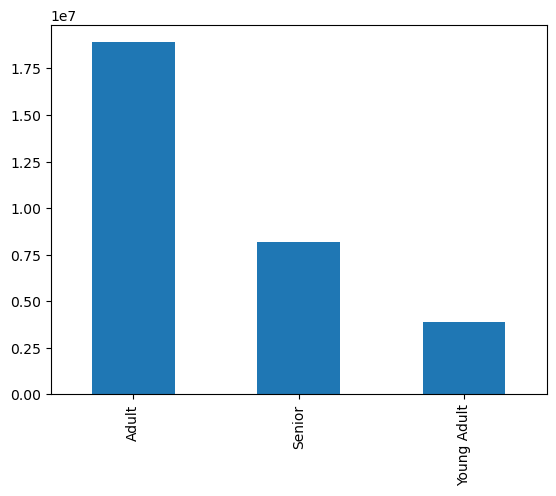

In [20]:
#creating a bar chart
bar = active['age_group'].value_counts().plot.bar()

In [21]:
#saving bar chart to file
bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'bar_age_groups.png'))

In [22]:
#aggregate for age group usage frequency
active.groupby('age_group').agg({'median_days_since_previous_order': ['mean', 'min', 'max']})

median_days_since_previous_order           
                                        mean  min   max
age_group                                              
Adult                               9.971613  0.0  30.0
Senior                              9.933025  0.0  30.0
Young Adult                         9.937482  0.0  30.0

In [23]:
#aggregate for age group expenditures
active.groupby('age_group').agg({'mean_price': ['mean', 'min', 'max']})

mean_price                      
                  mean     min           max
age_group                                   
Adult        11.953327  1.0000  15006.940000
Senior       11.757768  1.2625  14042.512281
Young Adult  12.209359  2.0000  10209.987755

#### creating an income_class flag for customers

In [24]:
#creating an income_class flag for customers
active.loc[active['income'] <= 52000, 'income_class'] = 'Lower Class'
active.loc[(active['income'] > 52000) & (active['income'] < 156000 ), 'income_class'] = 'Middle Class'
active.loc[active['income'] >= 156000, 'income_class'] = 'Upper Class'

C:\Users\Josh Abrams\AppData\Local\Temp\ipykernel_3924\3937753944.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active.loc[active['income'] <= 52000, 'income_class'] = 'Lower Class'


In [25]:
active['income_class'].value_counts(dropna = False)

Middle Class    24490104
Lower Class      3632814
Upper Class      2841646
Name: income_class, dtype: int64

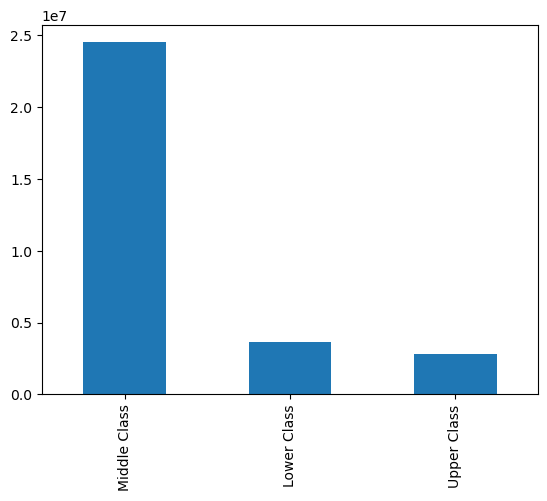

In [26]:
#creating a bar chart
bar2 = active['income_class'].value_counts().plot.bar()

In [27]:
#saving bar chart to file
bar2.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'bar_income_class.png'))

In [28]:
#aggregate for income class usage frequency
active.groupby('income_class').agg({'median_days_since_previous_order': ['mean', 'min', 'max']})

median_days_since_previous_order           
                                         mean  min   max
income_class                                            
Lower Class                         10.493952  0.0  30.0
Middle Class                         9.899040  0.0  30.0
Upper Class                          9.771593  0.0  30.0

In [29]:
#aggregate for income class expenditures
active.groupby('income_class').agg({'mean_price': ['mean', 'min', 'max']})

mean_price                   
                   mean  min           max
income_class                              
Lower Class    6.751973  1.0     13.878571
Middle Class   9.590213  1.3  14042.512281
Upper Class   38.753004  7.0  15006.940000

#### crossing marital status and num of dependants

In [30]:
#crossing marital status and num of dependants
crosstab1 = pd.crosstab(active['marital_status'], active['num_dpdnts'], dropna = False)

In [31]:
crosstab1

num_dpdnts,0,1,2,3
marital_status,,,,
divorced/widowed,2645271,0,0,0
living with parents and siblings,0,508045,484658,488469
married,0,7211061,7248603,7284047
single,5094410,0,0,0


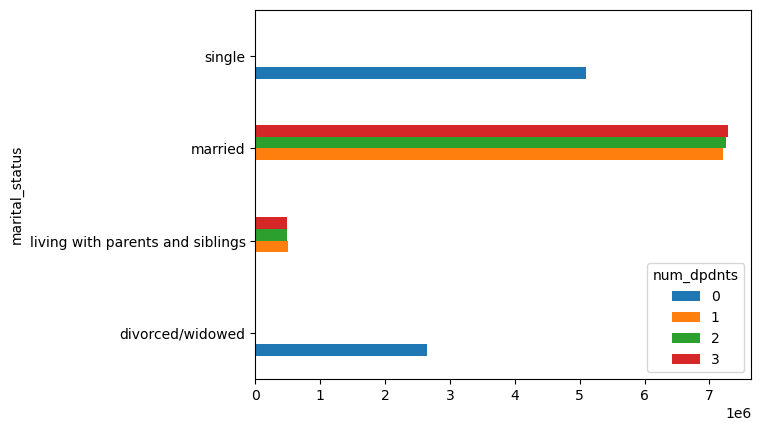

In [32]:
#create a horizontal bar chart
bar2 = crosstab1.plot.barh()

In [33]:
#saving bar chart to file
bar2.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'barh_marital_and_dependants.png'))

#### crossing income class and num of dependants

In [34]:
#crossing income class and num of dependants
crosstab2 = pd.crosstab(active['income_class'], active['num_dpdnts'], dropna = False)

In [35]:
crosstab2

num_dpdnts,0,1,2,3
income_class,,,,
Lower Class,909600,891742,918750,912722
Middle Class,6103722,6130253,6095321,6160808
Upper Class,726359,697111,719190,698986


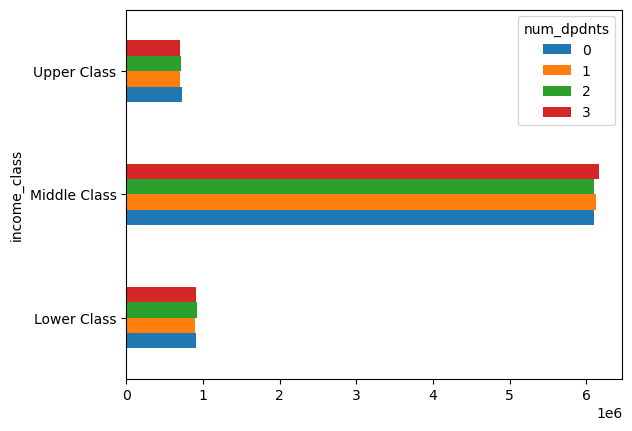

In [36]:
#create a horizontal bar chart
bar3 = crosstab2.plot.barh()

In [37]:
#saving bar chart to file
bar3.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'barh_income_dependants.png'))

#### crossing marital status and age group

In [38]:
#crossing marital status and age group
crosstab3 = pd.crosstab(active['marital_status'], active['age_group'], dropna = False)

In [39]:
crosstab3

age_group,Adult,Senior,Young Adult
marital_status,,,
divorced/widowed,623313,2021958,0
living with parents and siblings,0,0,1481172
married,14140006,6173586,1430119
single,4141183,0,953227


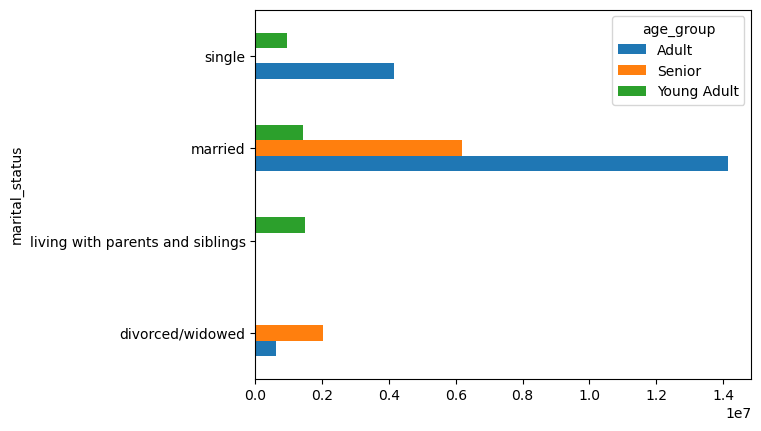

In [40]:
#create a horizontal bar chart
bar3 = crosstab3.plot.barh()

In [41]:
#saving bar chart to file
bar3.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'barh_marital_age.png'))

#### crossing gender and marital status

In [42]:
#crossing gender and marital status
crosstab5 = pd.crosstab(active['gender'], active['marital_status'], dropna = False)

In [43]:
crosstab5

marital_status,divorced/widowed,living with parents and siblings,married,single
gender,,,,
Female,1337129,723576,10795965,2521154
Male,1308142,757596,10947746,2573256


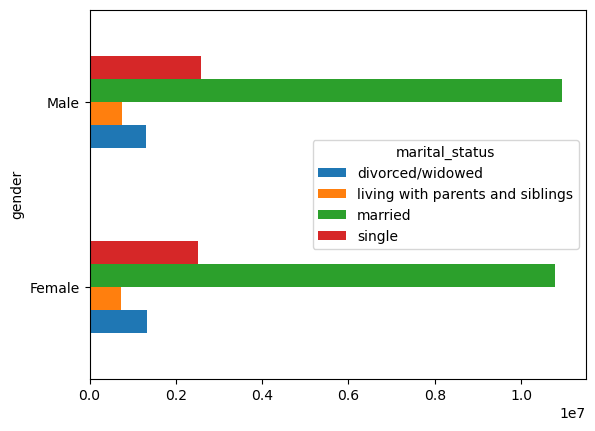

In [44]:
#create a horizontal bar chart
bar4 = crosstab5.plot.barh()

In [45]:
#saving bar chart to file
bar4.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'barh_gender_martial.png'))

#### crossing gender and num of dependants

In [46]:
#crossing gender and num of dependants
crosstab6 = pd.crosstab(active['gender'], active['num_dpdnts'], dropna = False)

In [47]:
crosstab6

num_dpdnts,0,1,2,3
gender,,,,
Female,3858283,3813296,3830944,3875301
Male,3881398,3905810,3902317,3897215


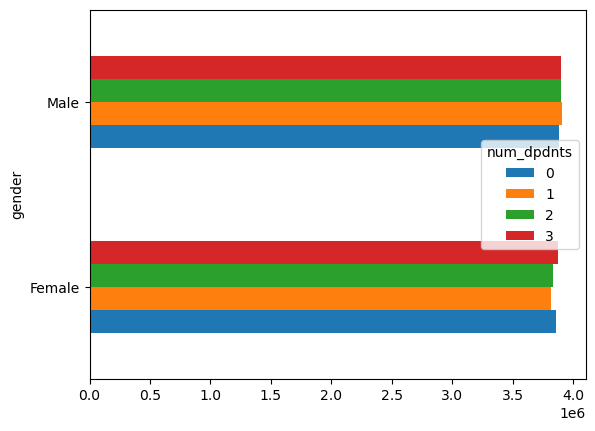

In [48]:
#create a horizontal bar chart
bar5 = crosstab6.plot.barh()

In [49]:
#saving bar chart to file
bar5.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'barh_gender_dependants.png'))

### import department data

In [50]:
#import department data
df_dept = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'departments_wrangled.csv'), index_col = False)

In [51]:
df_dept.tail()

,Unnamed: 0,department
16,17,household
17,18,babies
18,19,snacks
19,20,deli
20,21,missing


In [52]:
#rename column
df_dept.rename(columns= {'Unnamed: 0' : 'department_id'}, inplace= True)

In [53]:
#making df_dept into data dictionary
zip = zip(df_dept['department_id'], df_dept['department'])

In [54]:
data_dict= dict(zip)

In [55]:
data_dict

{1: 'frozen',
 2: 'other',
 3: 'bakery',
 4: 'produce',
 5: 'alcohol',
 6: 'international',
 7: 'beverages',
 8: 'pets',
 9: 'dry goods pasta',
 10: 'bulk',
 11: 'personal care',
 12: 'meat seafood',
 13: 'pantry',
 14: 'breakfast',
 15: 'canned goods',
 16: 'dairy eggs',
 17: 'household',
 18: 'babies',
 19: 'snacks',
 20: 'deli',
 21: 'missing'}

#### connecting department names to department ids

In [56]:
#connecting department names to department ids
active['department']= active['department_id'].map(data_dict)

C:\Users\Josh Abrams\AppData\Local\Temp\ipykernel_3924\1616572885.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active['department']= active['department_id'].map(data_dict)


In [57]:
active.head()

,Unnamed: 0_x,order_id,customer_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,...,date_joined,num_dpdnts,marital_status,income,_merge,region,activity,age_group,income_class,department
0,0,2539329,1,prior,1,2,8,NaN,196,1,...,2/17/2019,3,married,40423,both,South,Active,Adult,Lower Class,beverages
1,1,2398795,1,prior,2,3,7,15.0,196,1,...,2/17/2019,3,married,40423,both,South,Active,Adult,Lower Class,beverages
2,2,473747,1,prior,3,3,12,21.0,196,1,...,2/17/2019,3,married,40423,both,South,Active,Adult,Lower Class,beverages
3,3,2254736,1,prior,4,4,7,29.0,196,1,...,2/17/2019,3,married,40423,both,South,Active,Adult,Lower Class,beverages
4,4,431534,1,prior,5,4,15,28.0,196,1,...,2/17/2019,3,married,40423,both,South,Active,Adult,Lower Class,beverages


In [58]:
#looking at each departments average spending by customer
active['department'].value_counts(dropna = False)

produce            9079273
dairy eggs         5177182
snacks             2766406
beverages          2571901
frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699857
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
pets                 93060
missing              64768
other                34411
bulk                 33451
Name: department, dtype: int64

#### Based on the average cost spent in each depatment, profiles will be based on alcohol, pets, and babies

In [59]:
#creating a flag for frozen food
result = []

for value in active['department']:
    if value in ('frozen'):
        result.append('yes')
    elif value in ('alcohol', 'babies', 'bakery', 'beverages', 'breakfast', 'bulk', 'canned goods', 'dairy eggs', 'deli', 'dry goods pasta', 'household', 'international', 'meat seafood', 'missing', 'other', 'pantry', 'personal care', 'pets', 'produce', 'snacks'):
        result.append('no')

In [60]:
active['frozen_food_status'] = result

C:\Users\Josh Abrams\AppData\Local\Temp\ipykernel_3924\4242491956.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active['frozen_food_status'] = result


In [61]:
active['frozen_food_status'].value_counts(dropna = False)

no     28842833
yes     2121731
Name: frozen_food_status, dtype: int64

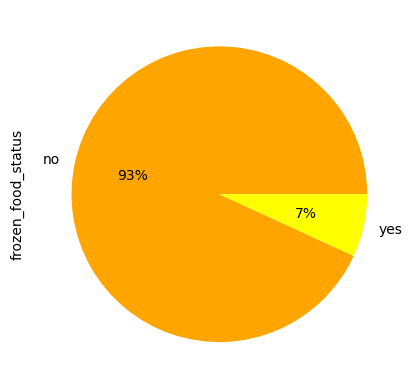

In [62]:
#creating a pie chart for frozen foods
frozen_food_pie = active['frozen_food_status'].value_counts().plot.pie(autopct=('%1.f%%'), colors = ['orange', 'yellow'])

In [63]:
#saving pie chart
frozen_food_pie.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'frozen_food_pie.png'))

In [64]:
#creating a flag for dairy eggs
result = []

for value in active['department']:
    if value in ('dairy eggs'):
        result.append('yes')
    elif value in ('alcohol', 'babies', 'bakery', 'beverages', 'breakfast', 'bulk', 'canned goods', 'deli', 'dry goods pasta', 'frozen', 'household', 'international', 'meat seafood', 'missing', 'other', 'pantry', 'pets', 'personal care', 'produce', 'snacks'):
        result.append('no')

In [65]:
active['dairy_eggs_status'] = result

C:\Users\Josh Abrams\AppData\Local\Temp\ipykernel_3924\1962554550.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active['dairy_eggs_status'] = result


In [66]:
active['dairy_eggs_status'].value_counts(dropna = False)

no     25787382
yes     5177182
Name: dairy_eggs_status, dtype: int64

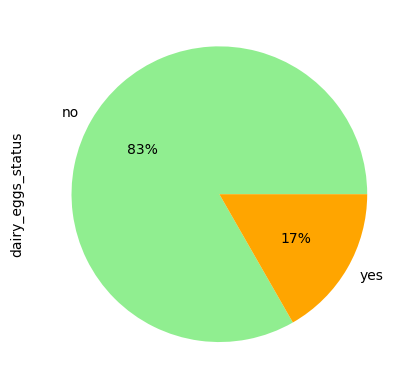

In [67]:
dairy_eggs_pie = active['dairy_eggs_status'].value_counts().plot.pie(autopct=('%1.f%%'), colors = ['lightgreen', 'orange'])

In [68]:
#saving pie chart to file
dairy_eggs_pie.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'dairy_eggs_pie.png'))

In [69]:
#creating a flag for produce
result = []

for value in active['department']:
    if value in ('produce'):
        result.append('yes')
    elif value in ('alcohol', 'babies', 'bakery', 'beverages', 'breakfast', 'bulk', 'canned goods', 'dairy eggs', 'deli', 'dry goods pasta', 'frozen', 'household', 'international', 'meat seafood', 'missing', 'other', 'pantry', 'personal care', 'pets', 'snacks'):
        result.append('no')

In [70]:
active['produce_status'] = result

C:\Users\Josh Abrams\AppData\Local\Temp\ipykernel_3924\267684031.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active['produce_status'] = result


In [71]:
active['produce_status'].value_counts(dropna = False)

no     21885291
yes     9079273
Name: produce_status, dtype: int64

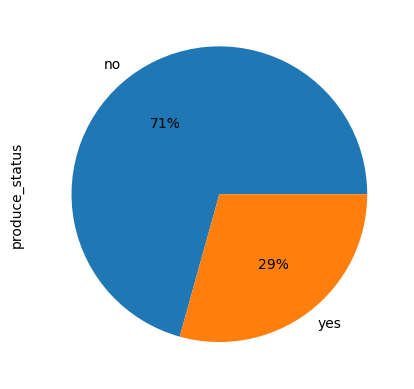

In [72]:
produce_pie = active['produce_status'].value_counts().plot.pie(autopct=('%1.f%%'))

In [73]:
#saving pie chart to file
produce_pie.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'produce_pie.png'))

In [74]:
pd.options.display.max_rows = None

In [75]:
active.head()

,Unnamed: 0_x,order_id,customer_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,...,income,_merge,region,activity,age_group,income_class,department,frozen_food_status,dairy_eggs_status,produce_status
0,0,2539329,1,prior,1,2,8,NaN,196,1,...,40423,both,South,Active,Adult,Lower Class,beverages,no,no,no
1,1,2398795,1,prior,2,3,7,15.0,196,1,...,40423,both,South,Active,Adult,Lower Class,beverages,no,no,no
2,2,473747,1,prior,3,3,12,21.0,196,1,...,40423,both,South,Active,Adult,Lower Class,beverages,no,no,no
3,3,2254736,1,prior,4,4,7,29.0,196,1,...,40423,both,South,Active,Adult,Lower Class,beverages,no,no,no
4,4,431534,1,prior,5,4,15,28.0,196,1,...,40423,both,South,Active,Adult,Lower Class,beverages,no,no,no


In [76]:
#looking at frozen status statistics
active.groupby('frozen_food_status').agg({'mean_price': ['mean', 'min', 'max']})

mean_price                    
                         mean       min       max
frozen_food_status                               
no                  11.895553  1.000000  15006.94
yes                 12.449657  1.845455  15006.94

In [77]:
#looking at frozen food status statistics
active.groupby('frozen_food_status').agg({'median_days_since_previous_order': ['mean', 'min', 'max']})

median_days_since_previous_order           
                                               mean  min   max
frozen_food_status                                            
no                                         9.912158  0.0  30.0
yes                                       10.568624  0.0  30.0

In [78]:
#looking at produce status statistics
active.groupby('produce_status').agg({'mean_price': ['mean', 'min', 'max']})

mean_price                   
                     mean  min           max
produce_status                              
no              12.588874  1.0  15006.940000
yes             10.353815  1.3  14042.512281

In [79]:
#looking at produce status statistics
active.groupby('produce_status').agg({'median_days_since_previous_order': ['mean', 'min', 'max']})

median_days_since_previous_order           
                                           mean  min   max
produce_status                                            
no                                    10.060508  0.0  30.0
yes                                    9.707974  0.0  30.0

In [80]:
#looking at dairy_eggs status statistics
active.groupby('dairy_eggs_status').agg({'mean_price': ['mean', 'min', 'max']})

mean_price                   
                        mean      min       max
dairy_eggs_status                              
no                 11.845917  1.00000  15006.94
yes                12.369873  1.56875  15006.94

In [81]:
#looking at alcohol status statistics
active.groupby('dairy_eggs_status').agg({'median_days_since_previous_order': ['mean', 'min', 'max']})

median_days_since_previous_order           
                                              mean  min   max
dairy_eggs_status                                            
no                                       10.001208  0.0  30.0
yes                                       9.737636  0.0  30.0

## 8: Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

#### Regional Distribution

In [82]:
#profiles with region and age group
crosstab1 = pd.crosstab(active['region'], active['age_group'], dropna = False)

In [83]:
crosstab1

age_group,Adult,Senior,Young Adult
region,,,
Midwest,4459312,1904046,898155
Northeast,3299969,1484807,679909
South,6287689,2708461,1314989
West,4857532,2098230,971465


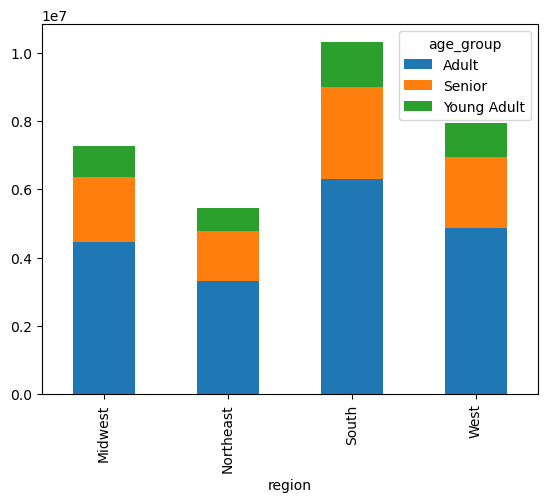

In [84]:
#create a bar chart
bar = crosstab1.plot(kind='bar', stacked =True)

In [85]:
#saving bar chart to file
bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'region_age_stacked_bar.png'))

In [86]:
# profiles with region and income class
crosstab2 = pd.crosstab(active['region'], active['income_class'], dropna = False)

In [87]:
crosstab2

income_class,Lower Class,Middle Class,Upper Class
region,,,
Midwest,854638,5742788,664087
Northeast,637547,4338535,488603
South,1233080,8119003,959056
West,907549,6289778,729900


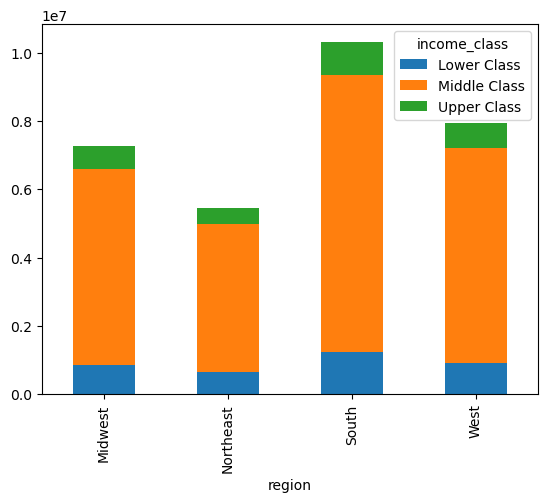

In [88]:
#create a bar chart
bar2 = crosstab2.plot(kind='bar', stacked =True)

In [89]:
#saving bar chart to file
bar2.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'region_income_stacked_bar.png'))

In [90]:
#profiles with region and marital status
crosstab3 = pd.crosstab(active['region'], active['marital_status'], dropna = False)

In [91]:
crosstab3

marital_status,divorced/widowed,living with parents and siblings,married,single
region,,,,
Midwest,617198,351435,5087262,1205618
Northeast,478767,256430,3853773,875715
South,877314,505457,7223749,1704619
West,671992,367850,5578927,1308458


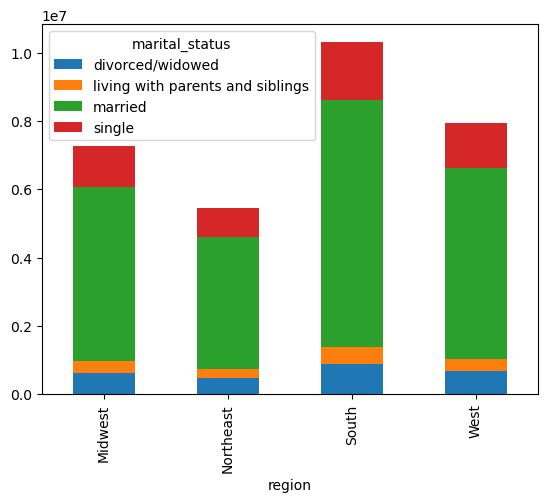

In [92]:
#create a bar chart
bar3 = crosstab3.plot(kind='bar', stacked =True)

In [93]:
#saving bar chart to file
bar3.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'region_martial_stacked_bar.png'))

In [94]:
#profiles with region and loyalty flag
crosstab4 = pd.crosstab(active['region'], active['loyalty_flag'], dropna = False)

In [95]:
crosstab4

loyalty_flag,Loyal customer,New customer,Regular customer
region,,,
Midwest,2373774,1136761,3750978
Northeast,1841785,842156,2780744
South,3405844,1593664,5311631
West,2662690,1231114,4033423


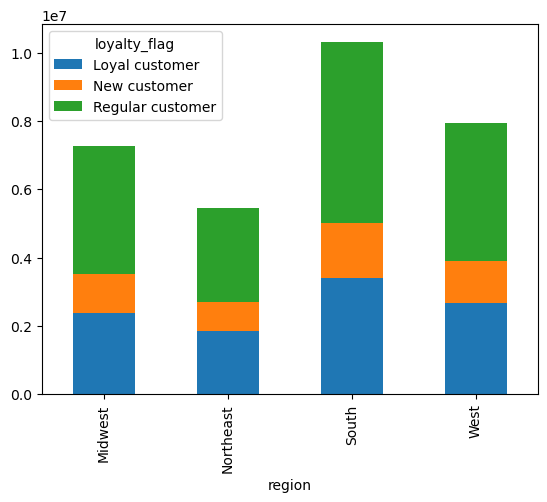

In [96]:
#create a bar chart
bar4 = crosstab4.plot(kind='bar', stacked =True)

In [97]:
#saving bar chart to file
bar4.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'region_loyalty_stacked_bar.png'))

In [98]:
#profiles with region and price range
crosstab5 = pd.crosstab(active['region'], active['price_range_loc'], dropna = False)

In [99]:
crosstab5

price_range_loc,High-range product,Low-range product,Mid-range product
region,,,
Midwest,93280,2267085,4901148
Northeast,69732,1712360,3682593
South,132661,3217500,6960978
West,102280,2477895,5347052


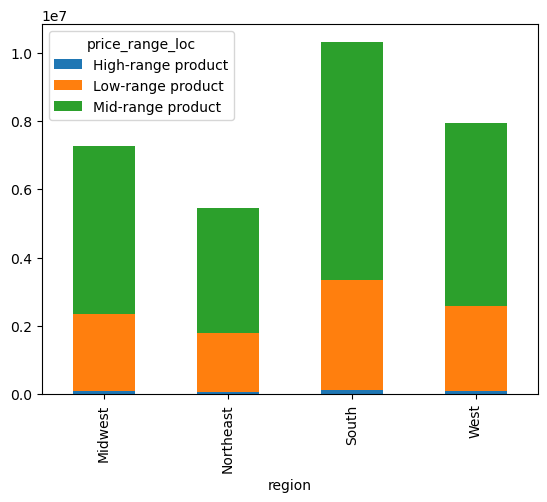

In [100]:
#create a bar chart
bar5 = crosstab5.plot(kind='bar', stacked =True)

In [101]:
#saving bar chart to file
bar5.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'region_price_range_stacked_bar.png'))

In [102]:
#profiles with region and departments
crosstab6 = pd.crosstab(active['department'], active['region'], dropna = False)

In [103]:
crosstab6

region,Midwest,Northeast,South,West
department,,,,
alcohol,34043,25017,48813,36754
babies,95741,72712,139511,102428
bakery,261753,199300,371620,288155
beverages,598979,462929,859419,650574
breakfast,156155,117904,223172,173619
bulk,7929,5599,11180,8743
canned goods,237459,176936,337458,260221
dairy eggs,1212490,914616,1723016,1327060
deli,234464,178398,333620,257352


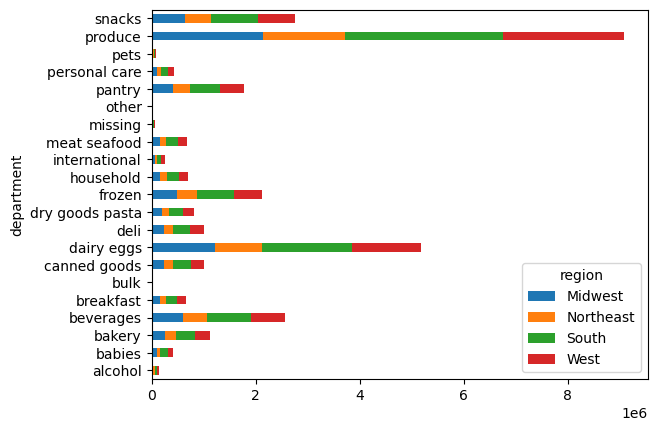

In [104]:
#create a bar chart
bar6 = crosstab6.plot(kind='barh', stacked =True)

In [105]:
#saving bar chart to file
bar6.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'region_department_stacked_bar.png'))

#### Customer Profiles Distribution

In [106]:
#profiles with order frequency and income
crosstab7 = pd.crosstab(active['income_class'], active['Frequency_flag'], dropna = False)

In [107]:
crosstab7

Frequency_flag,Frequent customer,Non-frequent customer,Regular customer
income_class,,,
Lower Class,2382529,403590,846695
Middle Class,16848387,2241649,5400068
Upper Class,1973560,249736,618350


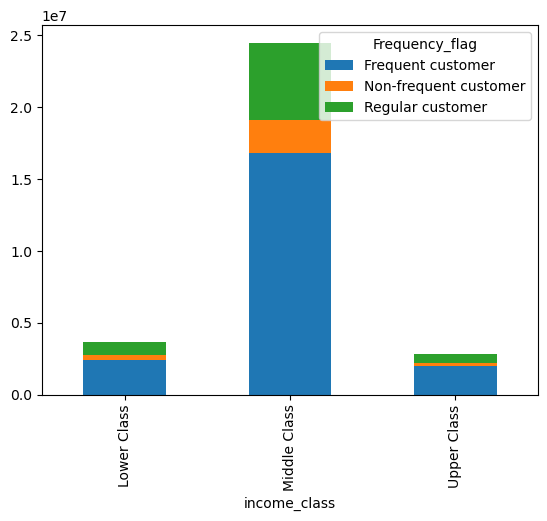

In [108]:
#create a bar chart
bar7 = crosstab7.plot(kind='bar', stacked =True)

In [109]:
#saving bar chart to file
bar7.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'income_frequency_stacked_bar.png'))

In [110]:
#profiles with order frequency and age group
crosstab8 = pd.crosstab(active['age_group'], active['Frequency_flag'], dropna = False)

In [111]:
crosstab8

Frequency_flag,Frequent customer,Non-frequent customer,Regular customer
age_group,,,
Adult,12919571,1776404,4208527
Senior,5630976,760132,1804436
Young Adult,2653929,358439,852150


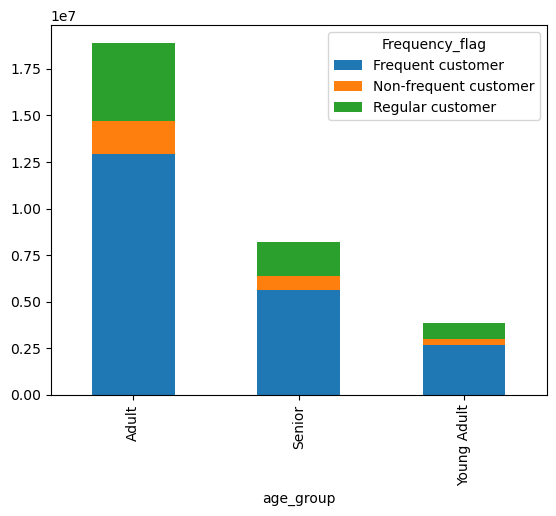

In [112]:
#create a bar chart
bar8 = crosstab8.plot(kind='bar', stacked =True)

In [113]:
#saving bar chart to file
bar8.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'age_frequency_stacked_bar.png'))

In [114]:
#profiles with order frequency and marital_status
crosstab9 = pd.crosstab(active['marital_status'], active['Frequency_flag'], dropna = False)

In [115]:
crosstab9

Frequency_flag,Frequent customer,Non-frequent customer,Regular customer
marital_status,,,
divorced/widowed,1819123,243934,582214
living with parents and siblings,1030514,138646,312012
married,14888825,2039823,4815063
single,3466014,472572,1155824


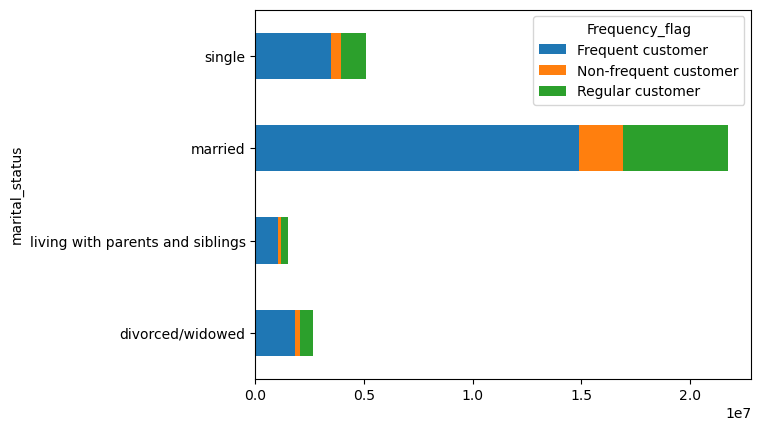

In [116]:
#create a bar chart
bar9 = crosstab9.plot(kind='barh', stacked =True)

In [117]:
#saving bar chart to file
bar9.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'marital_frequency_stacked_bar.png'))

#### Price Range Distribution

In [118]:
#profiles with price range and loyalty
crosstab10 = pd.crosstab(active['price_range_loc'], active['loyalty_flag'], dropna = False)

In [119]:
crosstab10

loyalty_flag,Loyal customer,New customer,Regular customer
price_range_loc,,,
High-range product,119936,65927,212090
Low-range product,3214690,1501288,4958862
Mid-range product,6949467,3236480,10705824


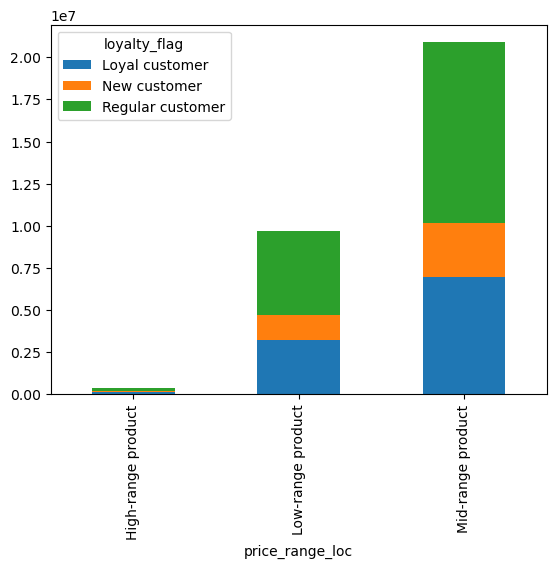

In [120]:
#create a bar chart
bar10 = crosstab10.plot(kind='bar', stacked =True)

In [121]:
#saving bar chart to file
bar10.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'price_loyalty_stacked_bar.png'))

In [122]:
#profiles with price range and marital status
crosstab11 = pd.crosstab(active['marital_status'], active['price_range_loc'], dropna = False)

In [123]:
crosstab11

price_range_loc,High-range product,Low-range product,Mid-range product
marital_status,,,
divorced/widowed,34134,826382,1784755
living with parents and siblings,18997,461807,1000368
married,281501,6793795,14668415
single,63321,1592856,3438233


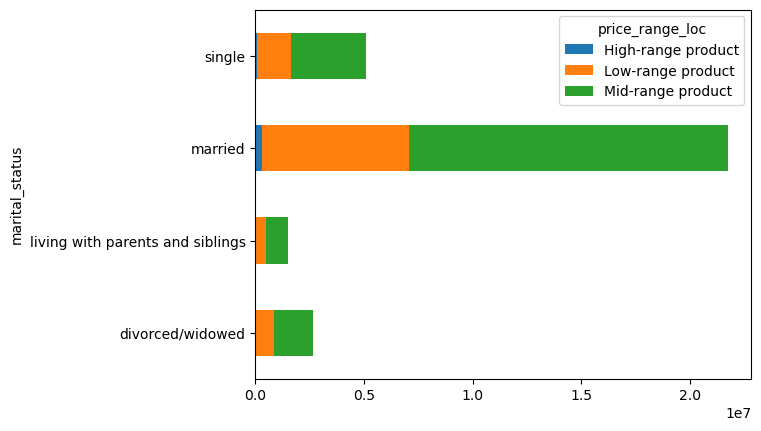

In [124]:
#create a bar chart
bar11 = crosstab11.plot(kind='barh', stacked =True)

In [125]:
#saving bar chart to file
bar11.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'price_marital_stacked_bar.png'))

In [126]:
#profiles with price range and age 
crosstab12 = pd.crosstab(active['age_group'], active['price_range_loc'], dropna = False)

In [127]:
crosstab12

price_range_loc,High-range product,Low-range product,Mid-range product
age_group,,,
Adult,241294,5907163,12756045
Senior,106915,2559099,5529530
Young Adult,49744,1208578,2606196


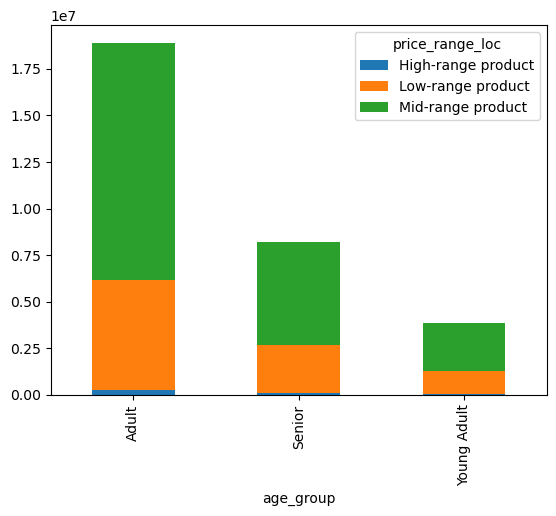

In [128]:
#create a bar chart
bar12 = crosstab12.plot(kind='bar', stacked =True)

In [129]:
#saving bar chart to file
bar12.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'price_age_stacked_bar.png'))

In [130]:
#profiles with price range and income
crosstab13 = pd.crosstab(active['income_class'], active['price_range_loc'], dropna = False)

In [131]:
crosstab13

price_range_loc,High-range product,Low-range product,Mid-range product
income_class,,,
Lower Class,19992,1487532,2125290
Middle Class,335396,7338075,16816633
Upper Class,42565,849233,1949848


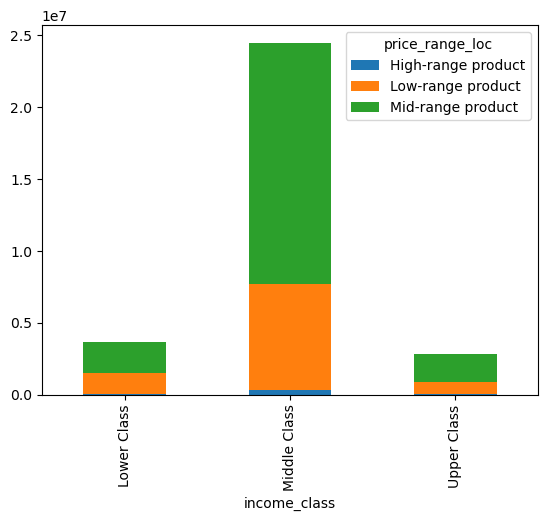

In [132]:
#create a bar chart
bar13 = crosstab13.plot(kind='bar', stacked =True)

In [133]:
#saving bar chart to file
bar13.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'price_income_stacked_bar.png'))

In [134]:
#9: export dataframe 
active.to_pickle(os.path.join(path, 'Data','Prepared Data', 'insta_final.pkl')) 